In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from keras.src.callbacks import EarlyStopping
import random
import numpy as np
import tensorflow as tf
from keras.api.layers import Dense, Dropout
from keras.api.models import Sequential
from keras.api.regularizers import l1, l2
from keras.api.optimizers import Adam

In [2]:
symbol = "^SPX"
start = "2004-01-01"
end = datetime.today().strftime('%Y-%m-%d')
interval = '1d'
ptc = 0

In [3]:
df = yf.download(symbol, start, end, interval=interval)
df.drop(columns=['Adj Close', 'Volume'], inplace=True)
df['returns'] = np.log(df['Close'].div(df['Close'].shift(1)))
df['day_of_week'] = df.index.dayofweek
df['dir'] = np.where(df['returns'] > 0, 1,0)
#df.dropna(inplace=True)

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,returns,day_of_week,dir
Date,,,,,,,
2004-01-02,1111.920044,1118.849976,1105.079956,1108.479980,NaN,4,0
2004-01-05,1108.479980,1122.219971,1108.479980,1122.219971,0.012319,0,1
2004-01-06,1122.219971,1124.459961,1118.439941,1123.670044,0.001291,1,1
2004-01-07,1123.670044,1126.329956,1116.449951,1126.329956,0.002364,2,1
2004-01-08,1126.329956,1131.920044,1124.910034,1131.920044,0.004951,3,1
...,...,...,...,...,...,...,...
2024-08-26,5639.660156,5651.620117,5602.339844,5616.839844,-0.003159,0,0
2024-08-27,5602.890137,5631.180176,5593.479980,5625.799805,0.001594,1,1
2024-08-28,5624.509766,5627.029785,5560.950195,5592.180176,-0.005994,2,0


In [4]:
extra = [
         {'symbol': "^TNX", 'name': 'tnx'},
         {'symbol': "EURUSD=X", 'name': 'eurusd'},
         {'symbol': "^TYX", 'name': 'tyx'},
         {'symbol': "^FVX", 'name': 'fvx'},
         {'symbol': "^IRX", 'name': 'irx'},
     #    {'symbol': "^GSPC", 'name': 'snp'},
     #    {'symbol': "^DJI", 'name': 'dow'}
        ]
for dict in extra:
    set = yf.download(dict['symbol'], start, end, interval=interval)

    set.drop(columns=['Adj Close', 'Open', 'High', 'Low', 'Volume'], inplace=True)
    set.rename(columns={'Close': f"{dict['name']}_close", }, inplace=True)  # 'Volume': f"{dict['name']}_volume"
    set[f"{dict['name']}_returns"] = np.log(set[f"{dict['name']}_close"].div(set[f"{dict['name']}_close"].shift(1)))
    df = set.join(df, how='outer')
    df[f"{dict['name']}_returns"] = df[f"{dict['name']}_returns"].ffill()
    df[f"{dict['name']}_close"] = df[f"{dict['name']}_close"].ffill()

df.dropna(inplace=True)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,irx_close,irx_returns,fvx_close,fvx_returns,tyx_close,tyx_returns,eurusd_close,eurusd_returns,tnx_close,tnx_returns,Open,High,Low,Close,returns,day_of_week,dir
Date,,,,,,,,,,,,,,,,,
2004-01-05,0.902,0.000000,3.359,0.003579,5.175,-0.000193,1.268698,0.008313,4.387,0.003196,1108.479980,1122.219971,1108.479980,1122.219971,0.012319,0.0,1.0
2004-01-06,0.901,-0.001109,3.240,-0.036070,5.106,-0.013423,1.272103,0.002681,4.277,-0.025394,1122.219971,1124.459961,1118.439941,1123.670044,0.001291,1.0,1.0
2004-01-07,0.886,-0.016788,3.210,-0.009302,5.084,-0.004318,1.264095,-0.006315,4.246,-0.007274,1123.670044,1126.329956,1116.449951,1126.329956,0.002364,2.0,1.0
2004-01-08,0.847,-0.045016,3.247,0.011461,5.080,-0.000787,1.277498,0.010547,4.249,0.000706,1126.329956,1131.920044,1124.910034,1131.920044,0.004951,3.0,1.0
2004-01-09,0.842,-0.005921,3.050,-0.062590,4.967,-0.022495,1.285892,0.006549,4.086,-0.039117,1131.920044,1131.920044,1120.900024,1121.859985,-0.008927,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,4.998,-0.000400,3.664,0.003828,4.108,0.001462,1.118793,0.006346,3.818,0.002885,5639.660156,5651.620117,5602.339844,5616.839844,-0.003159,0.0,0.0
2024-08-27,4.968,-0.006021,3.657,-0.001912,4.128,0.004857,1.116470,-0.002079,3.833,0.003921,5602.890137,5631.180176,5593.479980,5625.799805,0.001594,1.0,1.0
2024-08-28,4.955,-0.002620,3.665,0.002185,4.131,0.000727,1.117793,0.001184,3.841,0.002085,5624.509766,5627.029785,5560.950195,5592.180176,-0.005994,2.0,0.0


In [5]:
for f in list(df.columns.values):
    for lag in range(1, 3 + 1):
        col = "{}_lag_{}".format(f, lag)
        df[col] = df[f].shift(lag)
df.dropna(inplace=True)

In [6]:
features_to_delete =  [
    'dir', 'returns', 'Close', 'eurgbp_close', 'eurgbp_returns', 'gbpusd_close', 'gbpusd_returns',  'Open', 'High', 'Low', 'usdyen_close', 'usdyen_returns', 'euroyen_close', 'euroyen_returns', 'tnx_returns', 'tnx_close', 'snp_close', 'snp_returns', 'dow_close', 'dow_returns', 'btcusd_close', 'btcusd_returns', 'fvx_close', 'fvx_returns', 'tyx_returns', 'tyx_close', 'irx_close', 'irx_returns', 'eurusd_close', 'eurusd_returns', 'day_of_week'
]
features = [item for item in  list(df.columns.values) if item not in features_to_delete]
features

['irx_close_lag_1',
 'irx_close_lag_2',
 'irx_close_lag_3',
 'irx_returns_lag_1',
 'irx_returns_lag_2',
 'irx_returns_lag_3',
 'fvx_close_lag_1',
 'fvx_close_lag_2',
 'fvx_close_lag_3',
 'fvx_returns_lag_1',
 'fvx_returns_lag_2',
 'fvx_returns_lag_3',
 'tyx_close_lag_1',
 'tyx_close_lag_2',
 'tyx_close_lag_3',
 'tyx_returns_lag_1',
 'tyx_returns_lag_2',
 'tyx_returns_lag_3',
 'eurusd_close_lag_1',
 'eurusd_close_lag_2',
 'eurusd_close_lag_3',
 'eurusd_returns_lag_1',
 'eurusd_returns_lag_2',
 'eurusd_returns_lag_3',
 'tnx_close_lag_1',
 'tnx_close_lag_2',
 'tnx_close_lag_3',
 'tnx_returns_lag_1',
 'tnx_returns_lag_2',
 'tnx_returns_lag_3',
 'Open_lag_1',
 'Open_lag_2',
 'Open_lag_3',
 'High_lag_1',
 'High_lag_2',
 'High_lag_3',
 'Low_lag_1',
 'Low_lag_2',
 'Low_lag_3',
 'Close_lag_1',
 'Close_lag_2',
 'Close_lag_3',
 'returns_lag_1',
 'returns_lag_2',
 'returns_lag_3',
 'day_of_week_lag_1',
 'day_of_week_lag_2',
 'day_of_week_lag_3',
 'dir_lag_1',
 'dir_lag_2',
 'dir_lag_3']

In [7]:
split = int(len(df)* 0.70)
train = df.iloc[:split].copy()
test = df.iloc[split:].copy()
mu, std = train.mean(), train.std()
train_standardized = (train-mu) / std

In [8]:
def set_seeds(seed = 100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
def cw(df):
    c0, c1 = np.bincount(df["dir"])
    w0 = (1/c0) * (len(df)) / 2
    w1 = (1/c1) * (len(df)) / 2
    return {0:w0, 1:w1}

dropout = 0.5

In [9]:
optimizer = Adam(learning_rate = 0.0001, clipvalue=1.0)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

set_seeds(100)
model = Sequential()
model.add(Dense(32, input_dim = len(features), activity_regularizer = None ,activation = "relu", kernel_regularizer=l2(0.001), )) 
model.add(Dropout(dropout, seed = 100))
model.add(Dense(32, activation = "relu", activity_regularizer = None, kernel_regularizer=l2(0.001),))
model.add(Dense(32, activation = "relu", activity_regularizer = None, kernel_regularizer=l2(0.001),))    
model.add(Dropout(dropout, seed = 100))        
model.add(Dense(1, activation = "sigmoid")) 
model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

model.fit(x=train_standardized[features], y=train['dir'], epochs=100, verbose=False,
          validation_split=0.2, shuffle=False, class_weight=cw(train), callbacks=[early_stopping] )


C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\keras\src\trainers\data_adapters\data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5693 - loss: 0.7359
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5344 - loss: 0.7378
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: xlabel='Date'>

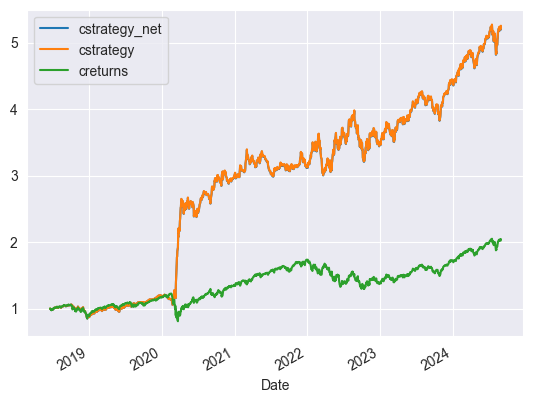

In [10]:
loss_train, accuracy_train =  model.evaluate(train_standardized[features], train['dir'])
predict = model.predict(train_standardized[features])

test_standardized = (test-mu) / std
loss_test, accuracy_test =  model.evaluate(test_standardized[features], test['dir'])
test['probability'] = model.predict(test_standardized[features])
threshold = 0.5
test['position'] = np.where(test.probability < (1-threshold), -1, np.nan)
test['position'] = np.where(test.probability > threshold, 1, test.position)
test['position'] = test.position.ffill()
test['strategy'] = test['position'] * test['returns']
test['creturns'] = test['returns'].cumsum().apply(np.exp)
test['cstrategy'] = test['strategy'].cumsum().apply(np.exp)
test['trades'] = test.position.diff().abs()
test['strategy_net'] = test.strategy - test.trades * ptc
test['cstrategy_net'] = test['strategy_net'].cumsum().apply(np.exp)
test[['cstrategy_net', 'cstrategy', 'creturns']].plot()

In [11]:
test[['cstrategy_net', 'cstrategy', 'creturns']].iloc[-1]

cstrategy_net    5.246705
cstrategy        5.255688
creturns         2.044603
Name: 2024-08-30 00:00:00, dtype: float64

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Axes: xlabel='Date'>

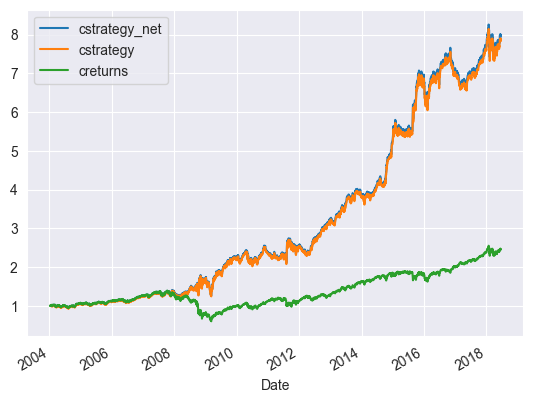

In [12]:
train['probability'] = model.predict(train_standardized[features])
threshold = 0.53
train['position'] = np.where(train.probability < (1-threshold), -1, np.nan)
train['position'] = np.where(train.probability > threshold, 1, train.position)
train['position'] = train.position.ffill()
train['strategy'] = train['position'] * train['returns']
train['creturns'] = train['returns'].cumsum().apply(np.exp)
train['cstrategy'] = train['strategy'].cumsum().apply(np.exp)
train['trades'] = train.position.diff().abs()
train['strategy_net'] = train.strategy - train.trades * ptc
train['cstrategy_net'] = train['strategy_net'].cumsum().apply(np.exp)
train[['cstrategy_net', 'cstrategy', 'creturns']].plot()

In [13]:
test

,irx_close,irx_returns,fvx_close,fvx_returns,tyx_close,tyx_returns,eurusd_close,eurusd_returns,tnx_close,tnx_returns,...,dir_lag_2,dir_lag_3,probability,position,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,1.888,-0.005283,2.796,0.010426,3.063,0.011492,1.158856,-0.003634,2.928,0.012026,...,0.0,0.0,0.507989,1.0,0.001711,1.001712,1.001712,NaN,NaN,NaN
2018-06-21,1.890,0.001059,2.767,-0.010426,3.043,-0.006551,1.157903,-0.000822,2.897,-0.010644,...,0.0,0.0,0.522021,1.0,-0.006366,0.995356,0.995356,0.0,-0.006366,0.993654
2018-06-22,1.870,-0.010638,2.774,0.002527,3.045,0.000657,1.160578,0.002307,2.900,0.001035,...,1.0,0.0,0.519112,1.0,0.001860,0.997209,0.997209,0.0,0.001860,0.995505
2018-06-25,1.853,-0.009132,2.743,-0.011238,3.024,-0.006920,1.166140,0.004781,2.875,-0.008658,...,0.0,1.0,0.511173,1.0,-0.013820,0.983523,0.983523,0.0,-0.013820,0.981842
2018-06-26,1.893,0.021357,2.748,0.001821,3.028,0.001322,1.170275,0.003540,2.880,0.001738,...,1.0,0.0,0.519431,1.0,0.002202,0.985691,0.985691,0.0,0.002202,0.984006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,4.998,-0.000400,3.664,0.003828,4.108,0.001462,1.118793,0.006346,3.818,0.002885,...,0.0,1.0,0.540361,1.0,-0.003159,2.033179,5.226322,0.0,-0.003159,5.217389
2024-08-27,4.968,-0.006021,3.657,-0.001912,4.128,0.004857,1.116470,-0.002079,3.833,0.003921,...,1.0,0.0,0.531173,1.0,0.001594,2.036422,5.234659,0.0,0.001594,5.225712
2024-08-28,4.955,-0.002620,3.665,0.002185,4.131,0.000727,1.117793,0.001184,3.841,0.002085,...,0.0,1.0,0.541750,1.0,-0.005994,2.024253,5.203377,0.0,-0.005994,5.194483


<Axes: >

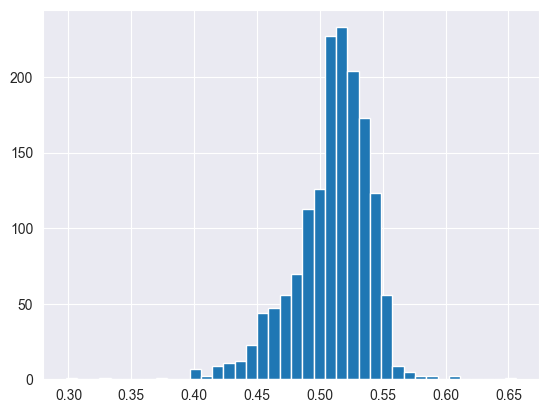

In [14]:
test.probability.hist(bins=40)

In [15]:
print(f"Loss: {loss_train}")
print(f"Accuracy: {accuracy_train}")
print(f"Loss: {loss_test}")
print(f"Accuracy: {accuracy_test}")

Loss: 0.7356897592544556
Accuracy: 0.5749244093894958
Loss: 0.7382130026817322
Accuracy: 0.531410276889801


In [16]:
test['prediction_dir'] = np.select(
    [test['probability'] < 0.47, test['probability'] > 0.53],
    [0, 1],
    default=np.nan
)

percentage_equal = (test['dir'] == test['prediction_dir']).mean() * 100
print(percentage_equal)

percentage_wrong = (test['dir'] == - test['prediction_dir']).mean() * 100
print(percentage_wrong)

19.230769230769234
5.384615384615385


C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame 

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.504604225835093
Prediction_local [0.52015663]
Right: 0.51508284


C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\lime\lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame 

<Figure size 5000x5000 with 0 Axes>

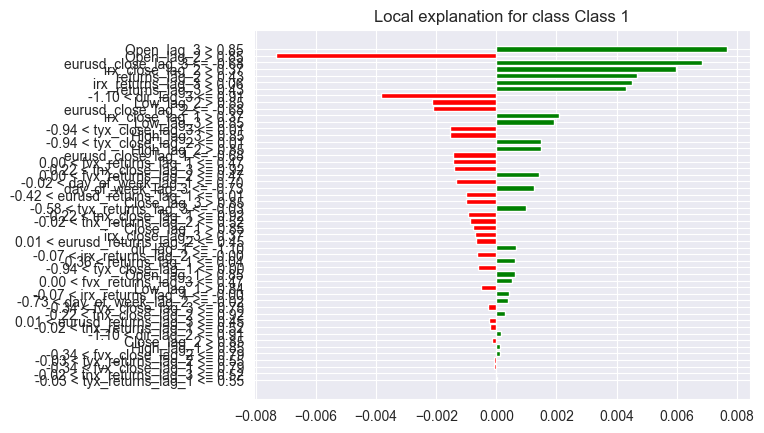

In [17]:
import lime
import lime.lime_tabular
import numpy as np

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(train_standardized[features]),
    mode='classification',
    feature_names=features,
    class_names=['Class 0', 'Class 1'],  # Assuming binary classification
    verbose=True,
    random_state=42
)

# Define a new predict function to return probabilities for both classes
def predict_fn(X):
    probs = model.predict(X)
    return np.hstack((1 - probs, probs))

# Pick a test instance to explain
i = 100  # Index of the test instance
exp = explainer.explain_instance(
    data_row=test_standardized[features].iloc[i],
    predict_fn=predict_fn,  # Modified predict function
    num_features=len(features)
)

plt.figure(figsize=(50, 50))  # Adjust the height (second value) as needed


# Show explanation (as text and visualization)
exp.show_in_notebook(show_table=False)
exp.as_pyplot_figure()
plt.rcParams.update({'font.size': 10})  # Adjust the number as needed
plt.show()